In [1]:
# Import libraries
import pandas as pd

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turn project folder path into a string
path = r'C:\Users\ASUS\Instacart Basket Analysis 01.2024'

In [3]:
# Import ords_prods_merge dataframe:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_fin.pkl'))

In [4]:
# Creating crosstab 
crosstab = pd.crosstab(ords_prods_merge['days_since_prior_order'], ords_prods_merge['number_of_orders'], dropna = False)

In [5]:
# copy crosstab to cliboard to past it to excel
crosstab.to_clipboard()

In [6]:
# Fix formatting to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
ords_prods_merge.describe()

,order_id,user_id,number_of_orders,orders_day_of_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_spend,Customer_frequency,Age,dependants,income
count,32434212.00,32434212.00,32434212.00,32434212.00,32434212.00,30356128.00,32434212.00,32434212.00,32434212.00,32434212.00,32434212.00,32429085.00,32434212.00,32434212.00,32434212.00,32434212.00,32434212.00,32434212.00
mean,1710747.96,102937.37,17.14,2.74,13.42,11.10,25577.78,8.35,0.59,71.22,9.92,7.80,33.05,11.98,10.40,49.47,1.50,99435.25
std,987299.60,59466.49,17.53,2.09,4.25,8.78,14096.14,7.13,0.49,38.20,6.28,4.24,25.15,83.19,7.13,18.49,1.12,43054.73
min,2.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,3.00,1.00,0.00,18.00,0.00,25903.00
25%,855945.00,51420.00,5.00,1.00,10.00,5.00,13535.00,3.00,0.00,31.00,4.00,4.20,13.00,7.39,6.00,33.00,1.00,66998.00
50%,1711049.00,102612.50,11.00,3.00,13.00,8.00,25256.00,6.00,1.00,83.00,9.00,7.40,26.00,7.83,8.00,49.00,2.00,96612.00
75%,2565510.00,154391.00,24.00,5.00,16.00,15.00,37935.00,11.00,1.00,107.00,16.00,11.30,47.00,8.26,13.00,65.00,3.00,127908.00
max,3421083.00,206209.00,99.00,6.00,23.00,30.00,49688.00,145.00,1.00,134.00,21.00,25.00,99.00,25005.42,30.00,81.00,3.00,593901.00


#### Security implications include PII like first name, surname , marital status and income.

In [8]:
ords_prods_merge

,order_id,user_id,number_of_orders,orders_day_of_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First_Name,Surname,Gender,State,Age,dependants,family_status,income,merge_indicator
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.00,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.00,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.00,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.00,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434207,156685,106143,26,4,23,5.00,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both
32434208,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,3,married,46151,both
32434209,1561557,66343,2,1,11,30.00,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,3,married,46151,both
32434210,276317,66343,3,6,15,19.00,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,3,married,46151,both


In [9]:
#Create a list hold,ng True/False values to test np.random.rand <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [10]:
# Store 70% of the sample in dataframe big
big = ords_prods_merge [dev]

In [11]:
# Store 30% of the sample in dataframe small
small = ords_prods_merge[~dev]

In [12]:
small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9729729 entries, 0 to 32434209
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   number_of_orders        int64   
 3   orders_day_of_week      int64   
 4   time_of_day             int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  max_order               int64   
 15  loyalty_flag            object  
 16  average_spend           float64 
 17  spender_flag            object  
 18  Customer_frequency      float64 
 19  frequency_flag          object  
 20  First_Name              object  
 21  Surname     

In [13]:
small = small.copy()

In [14]:
# Create a "Region" column based on the "State" column
small['region'] = 'West'  # Set default region

# Map states to regions using loc function with mapping
small.loc[small['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'
small.loc[small['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'
small.loc[small['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'


In [15]:
small['region'].value_counts(dropna = False)


region
South        3241051
West         2488329
Midwest      2281593
Northeast    1718756
Name: count, dtype: int64

In [16]:
small['spender_flag']

0            Low_Spender
2            Low_Spender
3            Low_Spender
6            Low_Spender
10           Low_Spender
                ...     
32434188    High_spender
32434191    High_spender
32434199    High_spender
32434204    High_spender
32434209     Low_Spender
Name: spender_flag, Length: 9729729, dtype: object

In [17]:
# Creating high spenders filter
high_spenders = small[small['spender_flag'] == 'High_spender']

# Creating low spenders filter
low_spenders = small[small['spender_flag'] == 'Low_Spender']

# Group by region and count the number of customers in each region for high spenders
high_spenders_counts = high_spenders.groupby('region').size()
low_spenders_counts = low_spenders.groupby('region').size()

In [18]:
small[small['spender_flag'] == 'Low_Spender']


,order_id,user_id,number_of_orders,orders_day_of_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First_Name,Surname,Gender,State,Age,dependants,family_status,income,merge_indicator,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South
2,473747,1,3,3,12,21.00,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South
3,2254736,1,4,4,7,29.00,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South
6,550135,1,7,1,9,20.00,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South
10,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434144,974461,178074,10,4,14,3.00,19318,1,1,SteviaClear Sweetener,...,Rose,Fitzgerald,Female,Maryland,52,0,single,37731,both,South
32434148,769719,92559,2,5,14,3.00,1078,1,1,French Vanilla Creme Protein Energy Bars,...,Justin,Carson,Male,Utah,48,1,married,51492,both,West
32434150,1953913,92559,4,6,12,9.00,1078,1,1,French Vanilla Creme Protein Energy Bars,...,Justin,Carson,Male,Utah,48,1,married,51492,both,West
32434181,1947537,166751,3,4,7,0.00,49001,1,1,Melatonin 2.5 Mg Sublingual Orange Tablets,...,Deborah,Glass,Female,Oregon,38,1,married,41766,both,West


In [19]:
# Checking the output for high spenders
high_spenders_counts.head()

region
Midwest      46559
Northeast    32464
South        62917
West         48177
dtype: int64

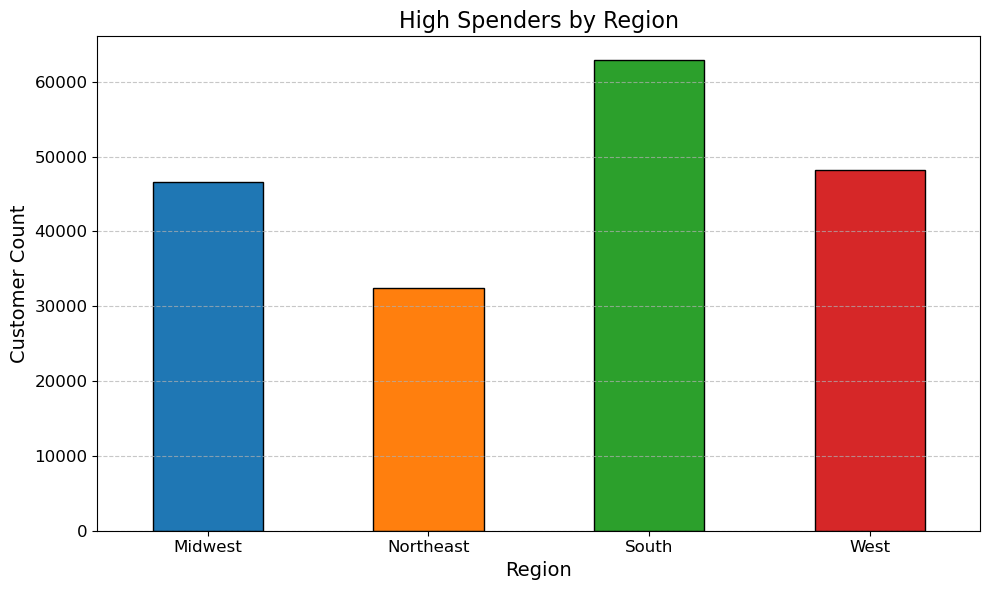

In [20]:
# Define custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # These are the default colors from the matplotlib color cycle

# Create a larger figure size
plt.figure(figsize=(10, 6))

# Creating bar chart for high spenders and saving it as an object
bar_regional_high_spenders = high_spenders_counts.plot(kind='bar', edgecolor='black', color=colors)

# Add a title and axis labels
plt.title('High Spenders by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)

# Customize tick labels rotation
plt.xticks(rotation=0)

# Customize tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



In [21]:
# Saving as png
bar_regional_high_spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_high_spenders.png'))

In [22]:
low_spenders_counts

region
Midwest      2235034
Northeast    1686292
South        3178134
West         2440152
dtype: int64

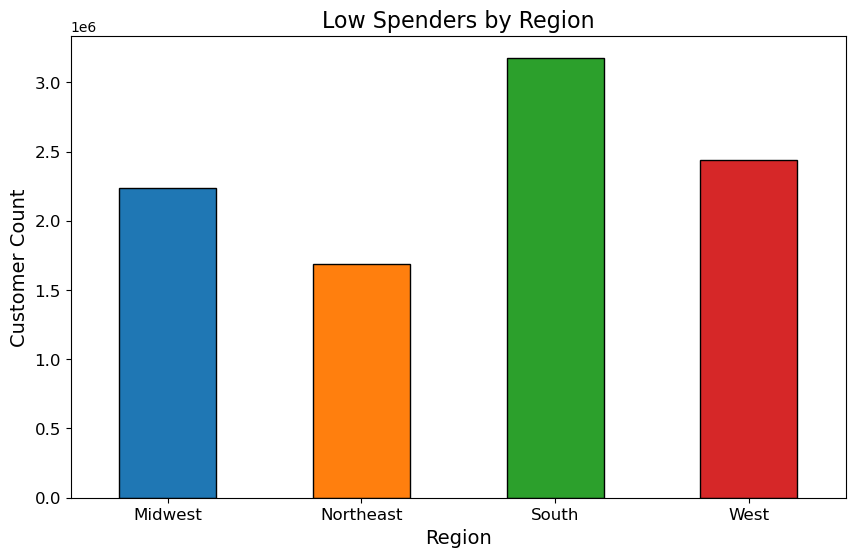

In [23]:
# Define custom colors for the low spenders bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # These are the default colors from the matplotlib color cycle

# Create a larger figure size for the low spenders bar chart
plt.figure(figsize=(10, 6))



# Create bar chart for low spenders and save it as an object
bar_regional_low_spenders = low_spenders_counts.plot.bar(
    edgecolor='black',  # Define the color of the edges of bars
    color=colors  # Define custom colors for bars
)

# Add title and axis labels for the low spenders bar chart
plt.title('Low Spenders by Region', fontsize=16)  # Title of the plot
plt.xlabel('Region', fontsize=14)  # Label for the x-axis
plt.ylabel('Customer Count', fontsize=14)  # Label for the y-axis

# Customize tick labels rotation for the low spenders bar chart
plt.xticks(rotation=0)

# Customize tick labels font size for the low spenders bar chart
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot for the low spenders bar chart
plt.show()

In [24]:
# Saving as png
bar_regional_low_spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_low_spenders.png'))

### The bar charts illustrate that both the highest and lowest spenders are predominantly from the South region, followed by the West. This suggests that the South region exhibits significant variability in spending habits, encompassing both high and low spenders. Conversely, other regions such as the Midwest demonstrate a similar pattern, albeit to a lesser extent. This insight underscores the importance of regional dynamics in consumer spending behavior, highlighting potential opportunities for targeted marketing strategies or regional-specific initiatives.

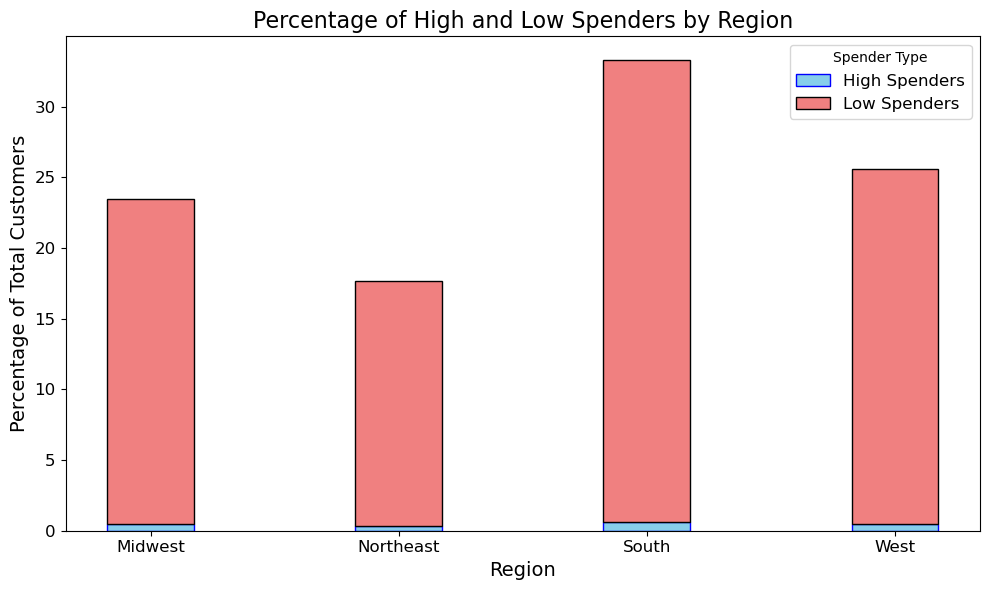

In [25]:
# Calculate total number of customers
total_customers = high_spenders_counts.sum() + low_spenders_counts.sum()

# Calculate percentages of high and low spender counts
percent_high_spenders = (high_spenders_counts / total_customers) * 100
percent_low_spenders = (low_spenders_counts / total_customers) * 100

# Define the number of regions
num_regions = len(high_spenders_counts.index)

# Set the width of the bars
bar_width = 0.35

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x locations for the bars
x = range(num_regions)

# Plot the bars for high spenders
bar_high_spenders = ax.bar(x, percent_high_spenders, bar_width, edgecolor='blue', color='skyblue', label='High Spenders')

# Plot the bars for low spenders on top of the high spenders
bar_low_spenders = ax.bar(x, percent_low_spenders, bar_width, bottom=percent_high_spenders, edgecolor='black', color='lightcoral', label='Low Spenders')

# Add title and axis labels
plt.title('Percentage of High and Low Spenders by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Percentage of Total Customers', fontsize=14)

# Customize tick labels and font size
plt.xticks(x, high_spenders_counts.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Customize legend
ax.legend(title='Spender Type', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
# Saving as png
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_regional_low_spenders.png'))

### Q4

In [27]:
# Creating exclusion flag
ords_prods_merge['exclusion_flag'] = ords_prods_merge['max_order'] < 5

In [28]:
ords_prods_merge['exclusion_flag'].value_counts()

exclusion_flag
False    30992664
True      1441548
Name: count, dtype: int64

In [29]:
# Creating new data set with orders =<5
df_exclusion = ords_prods_merge.loc[ords_prods_merge['exclusion_flag'] == False]
low_activity = ords_prods_merge.loc[ords_prods_merge['exclusion_flag'] == True]

In [30]:
df_exclusion .shape

(30992664, 30)

In [31]:
df_exclusion ['max_order'].describe()

count   30992664.00
mean          34.43
std           24.89
min            5.00
25%           14.00
50%           28.00
75%           48.00
max           99.00
Name: max_order, dtype: float64

In [32]:
# Creating new data set with orfers >5
df_order_less_5 = ords_prods_merge[ords_prods_merge['exclusion_flag']]

In [33]:
# exporting dataset sample as pickle format
df_order_less_5.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_order_less_5.pkl'))

## Q 5

In [34]:
ords_prods_merge['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15891077
Loyal customer      10293737
New customer         6249398
Name: count, dtype: int64

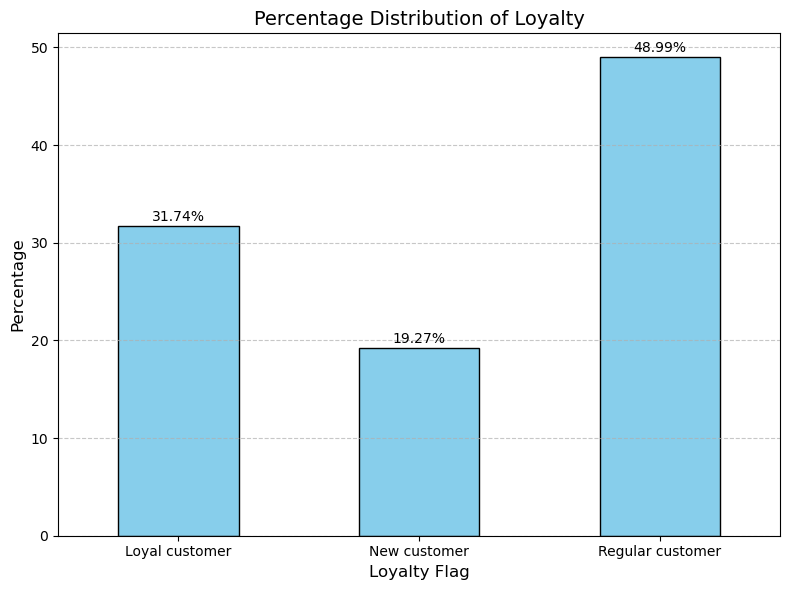

In [35]:
# Calculate percentage distribution of loyalty
loyalty_distribution = (ords_prods_merge['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))  # Set figure size
loyalty_distribution.plot(kind='bar', color='skyblue', edgecolor='black')  # Plotting the bar chart

# Adding labels and title
plt.xlabel('Loyalty Flag', fontsize=12)  # Label for the x-axis
plt.ylabel('Percentage', fontsize=12)  # Label for the y-axis
plt.title('Percentage Distribution of Loyalty', fontsize=14)  # Title of the plot

# Adding percentage labels on top of each bar
for index, value in enumerate(loyalty_distribution):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Save the plot as an image file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_distribution.png'))

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

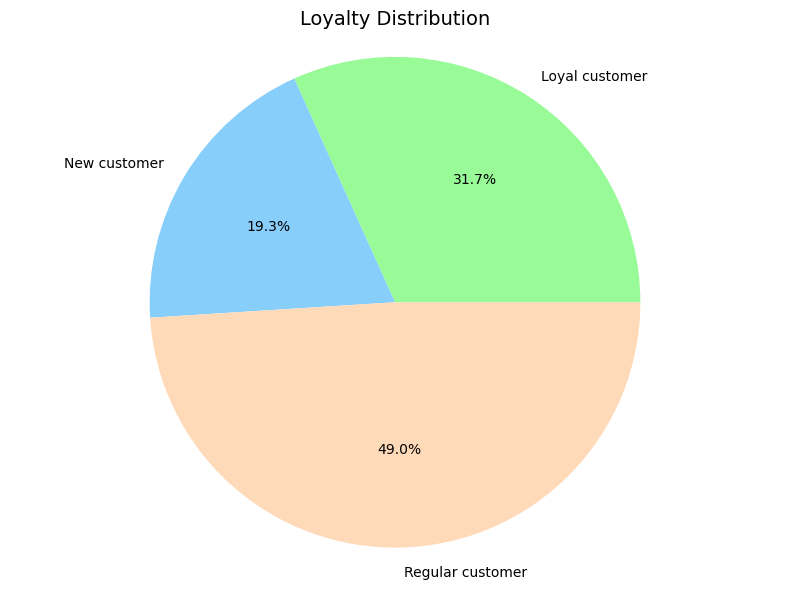

In [36]:
# Calculate percentage distribution of loyalty
loyalty_distribution = (ords_prods_merge['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()

# Plotting the pie chart
plt.figure(figsize=(8, 6))  # Set figure size
loyalty_pie = plt.pie(loyalty_distribution, labels=loyalty_distribution.index, autopct='%1.1f%%', colors=['palegreen', 'lightskyblue', 'peachpuff'])  # Plotting the pie chart

# Adding title
plt.title('Loyalty Distribution', fontsize=14)  # Title of the pie chart

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Save the pie chart as an image file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))

# Displaying the pie chart
plt.tight_layout()  # Adjust layout
plt.show()

In [37]:
# Define function to categorize age groups
def categorize_age(Age):
    if Age <= 35:
        return "Young Adult"
    elif 35 < Age <= 55:
        return "Middle-aged Adult"
    else:
        return "Senior"

# Define function to categorize income levels
def categorize_income(income):
    if income < 50000:
        return "Low Income"
    elif 50000 <= income < 100000:
        return "Middle Income"
    else:
        return "High Income"

# Apply functions to create profiling variable
small['age_group'] = small['Age'].apply(categorize_age)  # Changed 'age' to 'Age'
small['income_level'] = small['income'].apply(categorize_income)
small['profile'] = small['department_id'].apply(categorize_profile)


In [47]:
small.columns

Index(['order_id', 'user_id', 'number_of_orders', 'orders_day_of_week',
       'time_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'First_Name', 'Surname', 'Gender', 'State', 'Age', 'dependants',
       'family_status', 'income', 'merge_indicator', 'region', 'age_group',
       'income_level', 'profile'],
      dtype='object')

In [46]:
small.family_status.value_counts()

family_status
married                             6831356
single                              1599733
divorced/widowed                     833375
living with parents and siblings     465265
Name: count, dtype: int64

In [59]:
small.number_of_orders

0            1
2            3
3            4
6            7
10           1
            ..
32434188     7
32434191    10
32434199    18
32434204    23
32434209     2
Name: number_of_orders, Length: 9729729, dtype: int64

In [55]:
small

,order_id,user_id,number_of_orders,orders_day_of_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,dependants,family_status,income,merge_indicator,region,age_group,income_level,profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,3,married,40423,both,South,Young Adult,Low Income,Young Parent
2,473747,1,3,3,12,21.00,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,Young Adult,Low Income,Young Parent
3,2254736,1,4,4,7,29.00,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,Young Adult,Low Income,Young Parent
6,550135,1,7,1,9,20.00,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,Young Adult,Low Income,Young Parent
10,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Alabama,31,3,married,40423,both,South,Young Adult,Low Income,Regular Shopper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434188,2409631,106143,7,1,0,14.00,19675,1,1,Organic Raspberry Black Tea,...,Hawaii,25,0,single,53755,both,West,Young Adult,Middle Income,Young Parent
32434191,2835422,106143,10,2,11,11.00,19675,1,1,Organic Raspberry Black Tea,...,Hawaii,25,0,single,53755,both,West,Young Adult,Middle Income,Young Parent
32434199,3094081,106143,18,4,17,11.00,19675,1,1,Organic Raspberry Black Tea,...,Hawaii,25,0,single,53755,both,West,Young Adult,Middle Income,Young Parent
32434204,2988973,106143,23,2,22,5.00,19675,1,1,Organic Raspberry Black Tea,...,Hawaii,25,0,single,53755,both,West,Young Adult,Middle Income,Young Parent


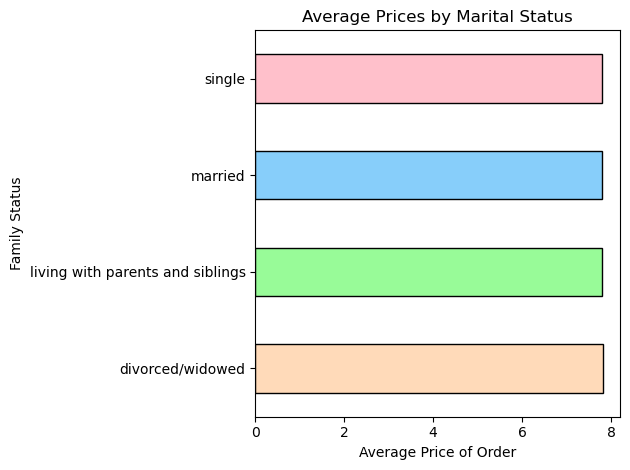

In [58]:
avg_prices_by_marital_status = small.groupby('family_status')['prices'].mean()
# Creating bar chart for average price by marital status
colors = ['peachpuff', 'palegreen', 'lightskyblue', 'pink']
bar_marital_avg_price = avg_prices_by_marital_status.plot(kind = 'barh', stacked = False, edgecolor = 'black', color = colors)
plt.title('Average Prices by Marital Status')
plt.xlabel('Average Price of Order')
plt.ylabel('Family Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_price_family.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


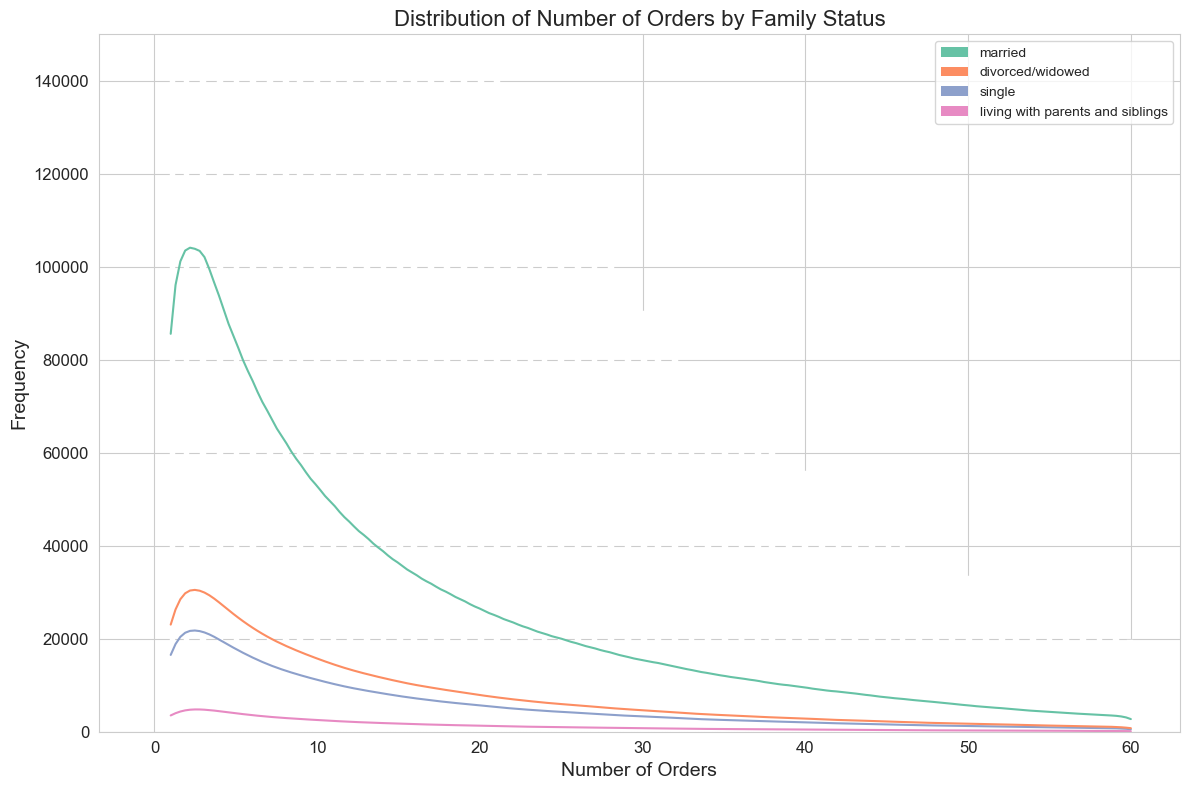

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set the style
sns.set_style("whitegrid")

# Define custom legend labels and colors
legend_labels = small['family_status'].unique()
legend_colors = sns.color_palette("Set2", len(legend_labels))

# Plot distributions for each family status
plt.figure(figsize=(12, 8))

# Plot distribution for each family status
sns.histplot(data=small[small['number_of_orders'] <= 60], x='number_of_orders', hue='family_status', multiple='stack', kde=True, palette='Set2', linewidth=2.5)
plt.title('Distribution of Number of Orders by Family Status', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Remove legend
plt.legend([], [], frameon=False)

# Add custom legend
for label, color in zip(legend_labels, legend_colors):
    plt.bar(0, 0, color=color, label=label, linewidth=0)

# Set y-axis limit for frequency
plt.ylim(0, 150000)

# Adjust tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.legend(loc='upper right')

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_distribution.png'))

plt.show()


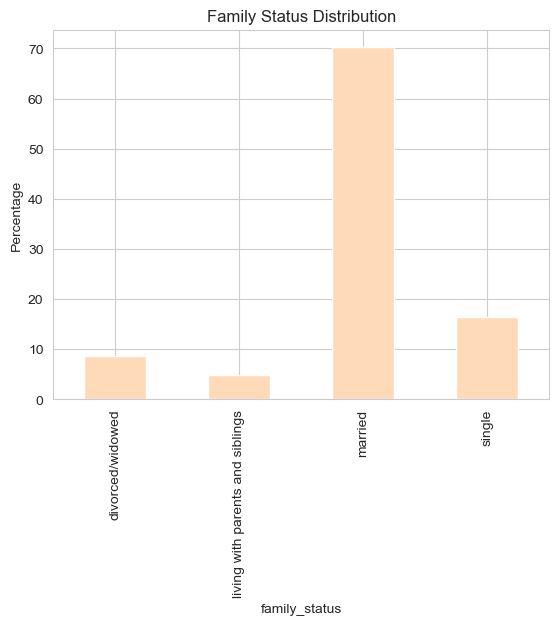

In [120]:
# Plot the percentage distribution of marital status
marital_distribution = (small['family_status'].value_counts(normalize=True) * 100).sort_index()
marital_distribution.plot.bar(color=['peachpuff'])
plt.ylabel('Percentage')
plt.title('Family Status Distribution')

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_status_distribution.png'))

plt.show()



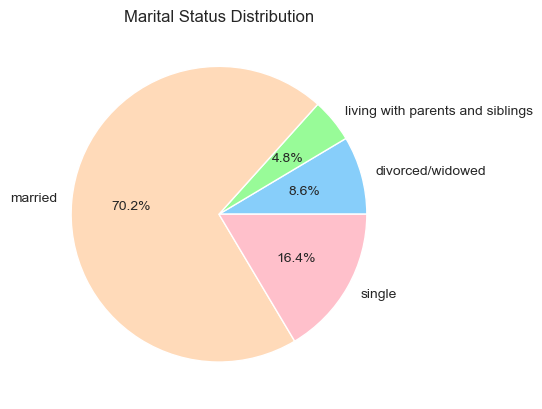

In [66]:
# Plot the pie chart of marital status
marital_pie=plt.pie(marital_distribution, labels=marital_distribution.index, autopct='%1.1f%%', colors = ['lightskyblue', 'palegreen', 'peachpuff', 'pink'])
plt.title('Marital Status Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_marital.png'))

In [90]:
def price_label(row):
    if row['prices'] <= 5:
        return 'Low-range product'
    elif (row['prices'] > 5) and (row['prices'] <= 15):
        return 'Mid-range product'
    else:
        return 'High range'

In [91]:
small['price_range'] = small.apply(price_label, axis=1)

<Axes: xlabel='price_range'>

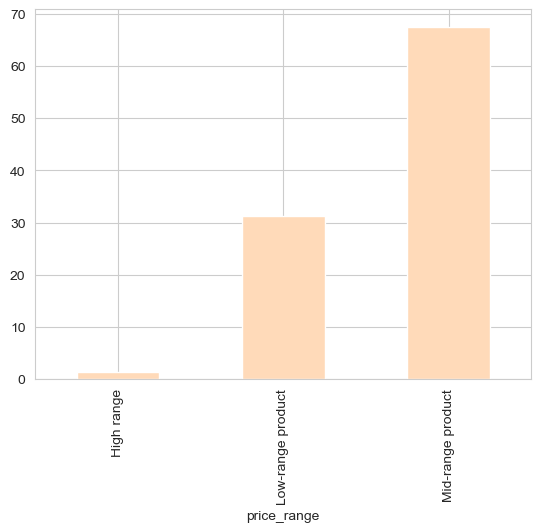

In [92]:
# Plot the percentage distribution of price range 
price_distribution = (small['price_range'].value_counts(normalize=True) * 100).sort_index()
price_distribution.plot.bar(color=['peachpuff'])

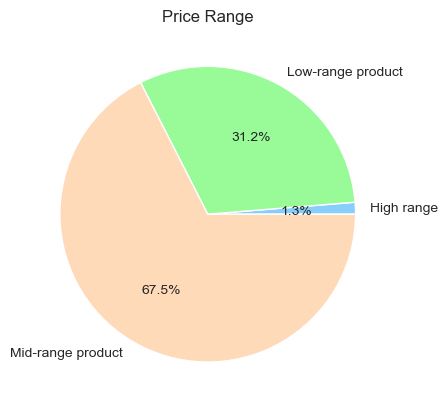

In [93]:
# Plot the pie chart of price range
income_pie=plt.pie(price_distribution, labels=price_distribution.index, autopct='%1.1f%%', colors = ['lightskyblue', 'palegreen', 'peachpuff'])
plt.title('Price Range')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_range.png'))

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


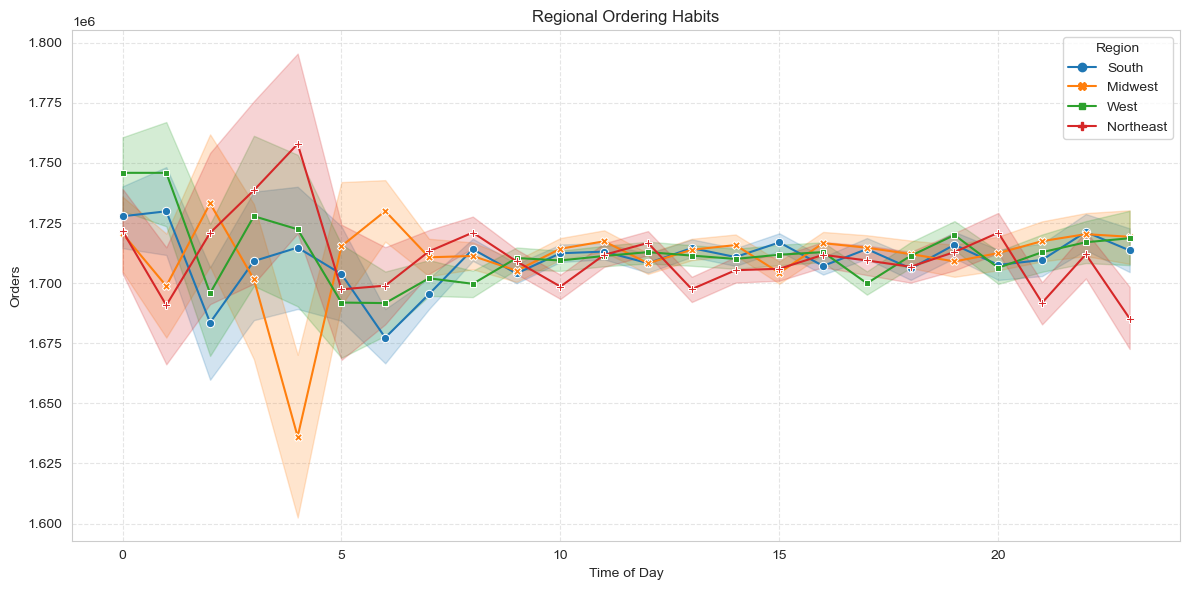

In [110]:
# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Set the figure size
plt.figure(figsize=(12, 6))

# Create Line Chart with custom palette and styling
regional_ordering_habits_line = sns.lineplot(data=small, x='time_of_day', y='order_id', hue='region', palette=custom_palette,
                                             style='region', markers=True, dashes=False)
plt.title('Regional Ordering Habits')
plt.xlabel('Time of Day')
plt.ylabel('Orders')
# Display the legend
plt.legend(title='Region', loc='upper right')
# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)
# Show the plot
plt.tight_layout()
plt.show()


In [111]:
# Saving as PNG
regional_ordering_habits_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regional_ordering_habits_line.png'))

In [112]:
small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'small_derived.pkl'))

In [117]:
small.columns

Index(['order_id', 'user_id', 'number_of_orders', 'orders_day_of_week',
       'time_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'First_Name', 'Surname', 'Gender', 'State', 'Age', 'dependants',
       'family_status', 'income', 'merge_indicator', 'region', 'age_group',
       'income_level', 'profile', 'price_range'],
      dtype='object')